<b>Самостоятельный проект: Сборный проект —2</b>   


<b>Описание проекта</b>   
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.    
В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании.   

Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.   

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли.   
У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.   
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

<b>Описание данных</b>

Заказчик предоставил данные с признаками:  
id — уникальный идентификатор сотрудника;  
dept — отдел, в котором работает сотрудник;   
level — уровень занимаемой должности;    
workload — уровень загруженности сотрудника;  
employment_years — длительность работы в компании (в годах);  
last_year_promo — показывает, было ли повышение за последний год;  
last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;  
supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;  
salary — ежемесячная зарплата сотрудника;  
job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.  
quit — увольнение сотрудника из компании.

<b>Этапы исследования</b>   
Задача 1: предсказание уровня удовлетворённости сотрудника  
Шаг 1. Загрузка данных  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Подготовка данных  
Шаг 5. Обучение моделей  
Шаг 6. Оформление выводов  
Задача 2: предсказание увольнения сотрудника из компании  
Шаг 1. Загрузка данных  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Добавление нового входного признака
Шаг 5. Подготовка данных  
Шаг 6. Обучение модели  
Шаг 7. Выводы  

# Блок 1

## Импорт

### Импорт инструментов

In [1]:
#Базовые биилиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random

!pip install scikit-learn --upgrade -q
 
!pip install phik -q
import phik
# Модели 
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder

#Метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import   make_scorer
#Пайплайны
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 

<b> Вывод :</b>   

Импортированы библиотеки для гарантированного обеспечения работоспособности на всех задачах


### Импорт данных

In [2]:
train_data= pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
test_features_data= pd.read_csv('/datasets/test_features.csv')
test_target_data= pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

## Предобработка данных

### Предобработка train_data

In [3]:
display(train_data.head(10))
train_data.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [4]:
display(train_data['dept'].unique())
display(train_data['level'].unique())
display(train_data['workload'].unique())

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

array(['junior', 'middle', 'sinior', nan], dtype=object)

array(['medium', 'high', 'low'], dtype=object)

In [5]:
train_data['job_satisfaction_rate']=train_data['job_satisfaction_rate']*100
train_data['job_satisfaction_rate'] = train_data['job_satisfaction_rate'].astype('int64')

In [6]:
display(len(train_data['id'].unique()))

4000

<b> Вывод :</b>   


Данные проверены, увеличен показатель целевого признака для уточнения дальнейших расчетов

### Предобработка test_features_data

In [7]:
display(test_features_data.head(10))
test_features_data.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [8]:
display(test_features_data['dept'].unique())
display(test_features_data['level'].unique())
display(test_features_data['workload'].unique())

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

array(['junior', 'middle', 'sinior', nan], dtype=object)

array(['medium', 'low', 'high', ' '], dtype=object)

In [9]:
#test_features_data['workload'] = test_features_data['workload'].str.replace(' ','low')
#display(test_features_data['workload'].unique())

<b> Вывод :</b>   

Данные проверены 

Присутсвуют пустые и пропущенные значения, которые скорее всего связаны с недостаточной информацией о сотрудниках(Неизвестен уровень загружения, или присутсвуют сложности в определении уровня квалификации), либо ошибками в заполнении(Сотрудник может работать в отделах, не соответсвующих наиболее распространенным вариантам).

### Предобработка test_target_data

In [10]:
display(test_target_data.head(10))
test_target_data.info()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [11]:
test_data=test_features_data
test_data = test_data.merge(test_target_data[['job_satisfaction_rate', 'id']], how='right', on='id')

In [12]:
test_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,130604,technology,junior,medium,1,no,no,4,34800,0.74
1,825977,marketing,middle,high,7,no,no,5,58800,0.75
2,418490,purchasing,junior,low,1,no,no,4,19200,0.60
3,555320,technology,junior,medium,1,no,no,4,34800,0.72
4,826430,technology,junior,medium,1,no,yes,2,30000,0.08


In [13]:
test_data['job_satisfaction_rate']=test_data['job_satisfaction_rate']*100
test_data['job_satisfaction_rate'] = test_data['job_satisfaction_rate'].astype('int64')

In [14]:
display(test_data.head(10))
test_data.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,130604,technology,junior,medium,1,no,no,4,34800,74
1,825977,marketing,middle,high,7,no,no,5,58800,75
2,418490,purchasing,junior,low,1,no,no,4,19200,60
3,555320,technology,junior,medium,1,no,no,4,34800,72
4,826430,technology,junior,medium,1,no,yes,2,30000,8
5,817219,technology,junior,medium,2,no,no,5,31200,76
6,269033,hr,junior,medium,1,no,no,4,27600,64
7,962356,technology,middle,high,2,no,no,3,56400,38
8,649052,technology,middle,medium,2,no,yes,3,45600,14
9,532834,sales,middle,medium,4,no,no,4,38400,59


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   job_satisfaction_rate  2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 171.9+ KB


<b> Вывод :</b>   

Цедевой признак присоединен к основному фрейму.  
Проверены типы данных, они соответсвуют смыслу переменных.  
Для удобства анализа и работоспособности моделей в дальнейшем увеличен в 100 раз показатель удовлетворенности компанией.  
Размерность фрейма сохранена, как и обеспечение его данными
Дальнейшая обработка продолжится в ходе работы пайплайнов, для работоспособности моделей.

## Исследовательский анализ данных

In [15]:
def analysis_BAR(adata_in, chapter, heading, Х, Y, bins):
    print(adata_in[chapter].describe())
    adata_ini = adata_in[chapter].value_counts(ascending=True)
    display(adata_ini)
    adata_ini.plot.bar(figsize=(10, 5), ec='black')
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    plt.legend(loc=2)
    plt.figure(figsize=(10,5))
    #plt.show()

In [16]:
def analysis_HIST(adata_in, chapter, heading, Х, Y, bins):
    print(adata_in[chapter].describe())
    #adata_ini = adata_in.groupby(chapter).mean()
    #display(adata_in[chapter].head(5))
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    
    plt.hist(x=adata_in[chapter], bins=bins, density=True)
    plt.figure(figsize=(10,5))
    #plt.show() 

Созданы рабочие функции

### Исследовательский train_data

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   3994 non-null   object
 2   level                  3996 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   job_satisfaction_rate  4000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 312.6+ KB


count    4000.000000
mean       53.364250
std        22.538402
min         3.000000
25%        36.000000
50%        56.000000
75%        71.000000
max       100.000000
Name: job_satisfaction_rate, dtype: float64


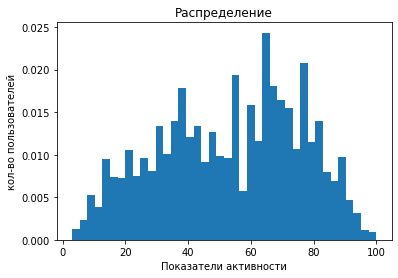

<Figure size 720x360 with 0 Axes>

In [18]:
analysis_HIST(train_data,
             'job_satisfaction_rate',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             40)

<b> Вывод :</b>   

В среднем распределение оценок работы компании лишено каких то особенно популярных значений.  
Основная масса распределена от 30 до 80 процентов с перекосом в большую сторону, следовательно удовлетворенность сотрудников можно еще повысить

count      3994
unique        5
top       sales
freq       1512
Name: dept, dtype: object


hr             456
marketing      550
purchasing     610
technology     866
sales         1512
Name: dept, dtype: int64

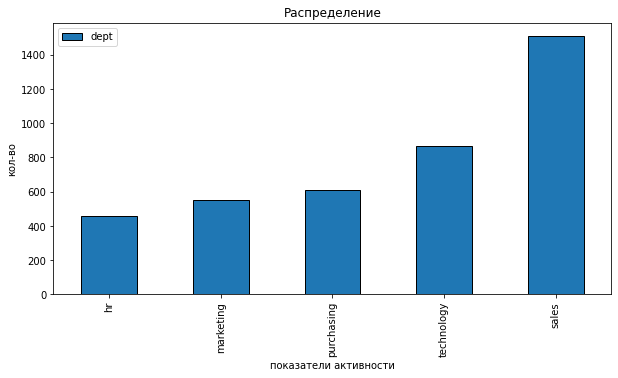

<Figure size 720x360 with 0 Axes>

In [19]:
analysis_BAR(train_data,
             'dept',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

<b> Вывод :</b>   

наибольшее количество сотрудников занято продажами и технологиями, наименьшее эйч-аром

count       3996
unique         3
top       junior
freq        1894
Name: level, dtype: object


sinior     358
middle    1744
junior    1894
Name: level, dtype: int64

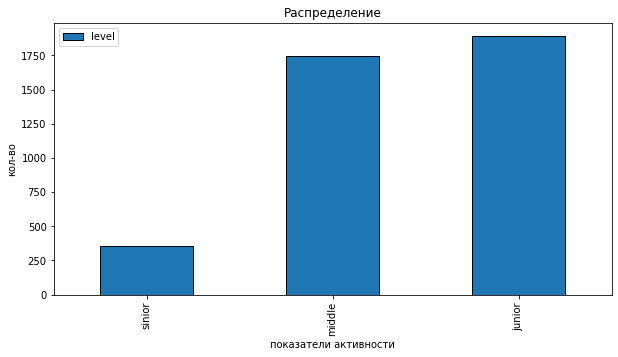

<Figure size 720x360 with 0 Axes>

In [20]:
analysis_BAR(train_data,
             'level',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

<b> Вывод :</b>   

Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 45 процентов


count       4000
unique         3
top       medium
freq        2066
Name: workload, dtype: object


high       734
low       1200
medium    2066
Name: workload, dtype: int64

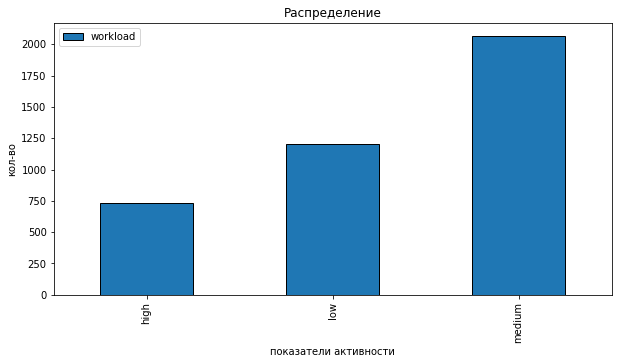

<Figure size 720x360 with 0 Axes>

In [21]:
analysis_BAR(train_data,
             'workload',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

<b> Вывод :</b>   

Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


10     91
9     130
8     193
6     287
7     301
5     380
4     384
3     483
2     785
1     966
Name: employment_years, dtype: int64

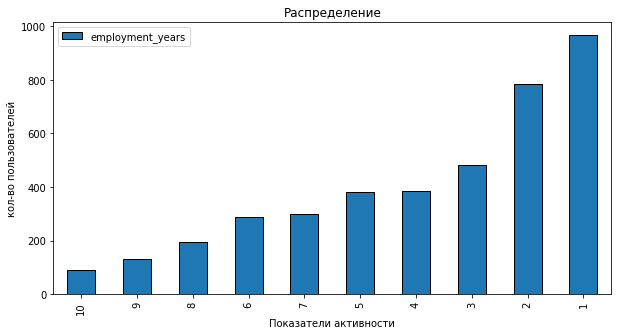

<Figure size 720x360 with 0 Axes>

In [22]:
analysis_BAR(train_data,
             'employment_years',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             20)

<b> Вывод :</b>   

Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата

count     4000
unique       2
top         no
freq      3880
Name: last_year_promo, dtype: object


yes     120
no     3880
Name: last_year_promo, dtype: int64

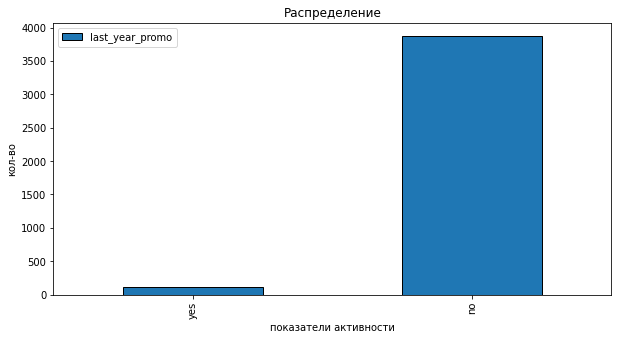

<Figure size 720x360 with 0 Axes>

In [23]:
analysis_BAR(train_data,
             'last_year_promo',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

<b> Вывод :</b>   

Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании

count     4000
unique       2
top         no
freq      3441
Name: last_year_violations, dtype: object


yes     559
no     3441
Name: last_year_violations, dtype: int64

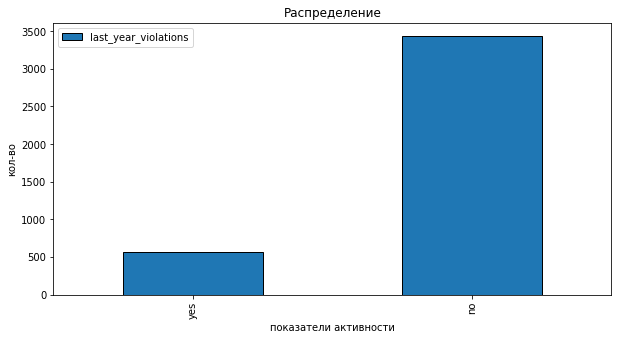

<Figure size 720x360 with 0 Axes>

In [24]:
analysis_BAR(train_data,
             'last_year_violations',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

<b> Вывод :</b>   

Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


1     201
2     387
5     546
3    1263
4    1603
Name: supervisor_evaluation, dtype: int64

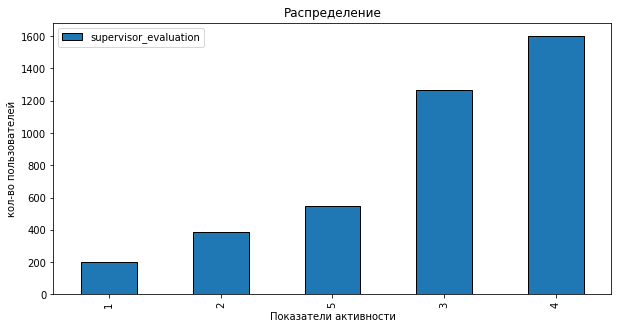

<Figure size 720x360 with 0 Axes>

In [25]:
analysis_BAR(train_data,
             'supervisor_evaluation',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   

Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


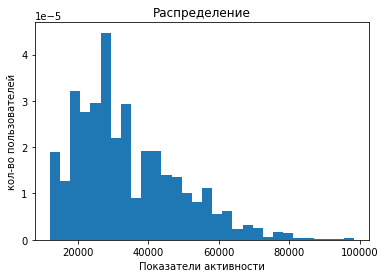

<Figure size 720x360 with 0 Axes>

In [26]:
analysis_HIST(train_data,
             'salary',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   
В среднем у большинства сотрудников зарплата сосредоточена от 20 до 50 тысяч, также можно сделать вывод что у многих ставка 30 тыссяч, так как на графике видно выброс


<b> Вывод по разделу :</b>   

В среднем распределение оценок рабоыт компании лишено каких то особенно популярных значений.  
Основная масса распределена от 30 до 80 процентов с перекосом в большую сторону, следовательно удовлетворенность сотрудников можно еще повысить  
наибольшее количество сотрудников занято продажами и технологиями, наименьшее эйч-аром  
Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 45 процентов  
Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо

Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата  
Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании  
Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год  
Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.

В среднем у большинства сотрудников зарплата сосредоточена от 20 до 50 тысяч, также можно сделать вывод что у многих ставка 30 тыссяч, так как на графике видно выброс


### Исследовательский test_data

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   job_satisfaction_rate  2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 171.9+ KB


count      1998
unique        6
top       sales
freq        763
Name: dept, dtype: object


                1
hr            227
purchasing    273
marketing     279
technology    455
sales         763
Name: dept, dtype: int64

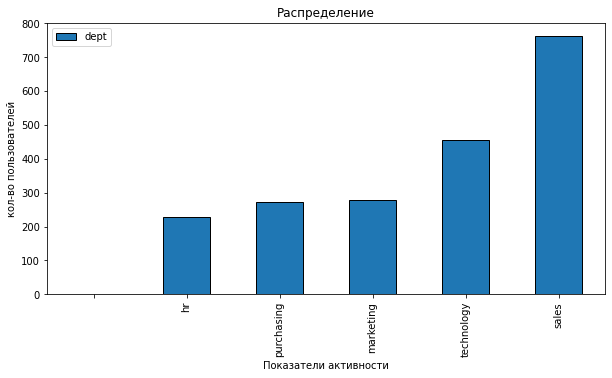

<Figure size 720x360 with 0 Axes>

In [28]:
analysis_BAR(test_data,
             'dept',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   

наибольшее количество сотрудников занято продажами и технологиями, наименьшее эйч-аром

count       1999
unique         3
top       junior
freq         974
Name: level, dtype: object


sinior    171
middle    854
junior    974
Name: level, dtype: int64

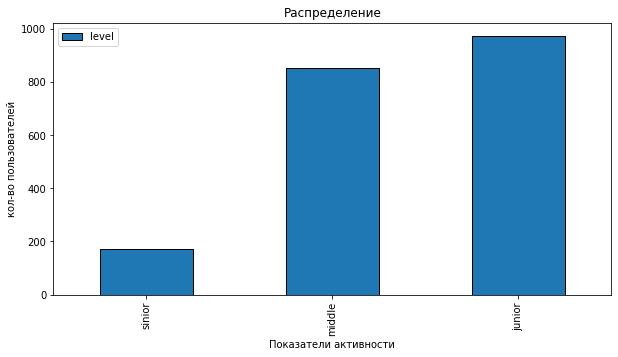

<Figure size 720x360 with 0 Axes>

In [29]:
analysis_BAR(test_data,
             'level',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   

Наибольшее количество сотрудников обладают низкими и средними уровнями квалификации, примерно по 45 процентов


count       2000
unique         4
top       medium
freq        1043
Name: workload, dtype: object


             1
high       363
low        593
medium    1043
Name: workload, dtype: int64

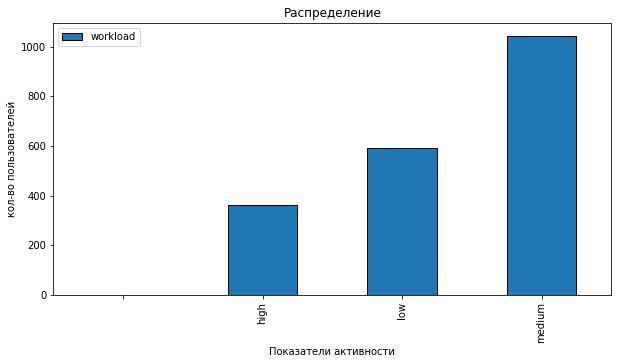

<Figure size 720x360 with 0 Axes>

In [30]:
analysis_BAR(test_data,
             'workload',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   

Почти половина сотрудников загружаются задачами средне

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


10     35
9      66
8      91
6     138
7     174
5     179
4     187
3     234
2     374
1     522
Name: employment_years, dtype: int64

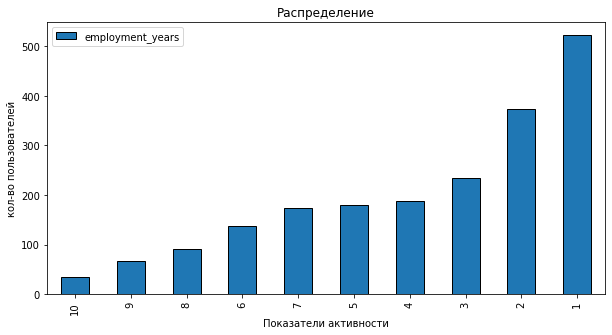

<Figure size 720x360 with 0 Axes>

In [31]:
analysis_BAR(test_data,
             'employment_years',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             20)

<b> Вывод :</b>   
 
Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата

count     2000
unique       2
top         no
freq      1937
Name: last_year_promo, dtype: object


yes      63
no     1937
Name: last_year_promo, dtype: int64

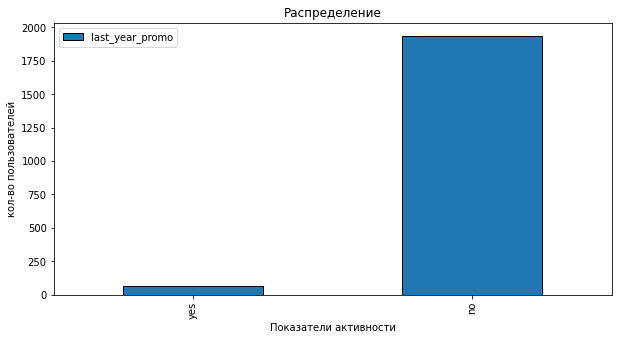

<Figure size 720x360 with 0 Axes>

In [32]:
analysis_BAR(test_data,
             'last_year_promo',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   
 Подавляющее большинство сотрудников не получало повышений в прошлый год

count     2000
unique       2
top         no
freq      1738
Name: last_year_violations, dtype: object


yes     262
no     1738
Name: last_year_violations, dtype: int64

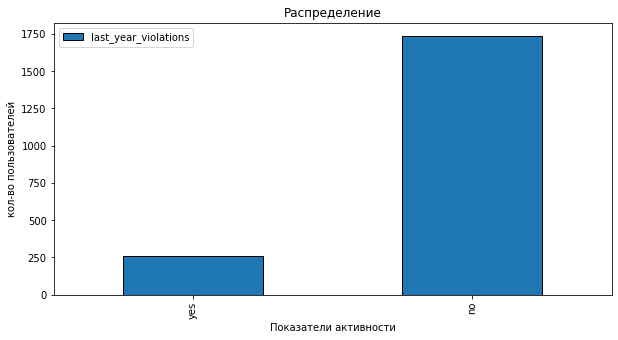

<Figure size 720x360 with 0 Axes>

In [33]:
analysis_BAR(test_data,
             'last_year_violations',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   
 Подавляющее большинство сотрудников не нарушало контракт в прошлый год

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


1     88
2    196
5    284
3    575
4    857
Name: supervisor_evaluation, dtype: int64

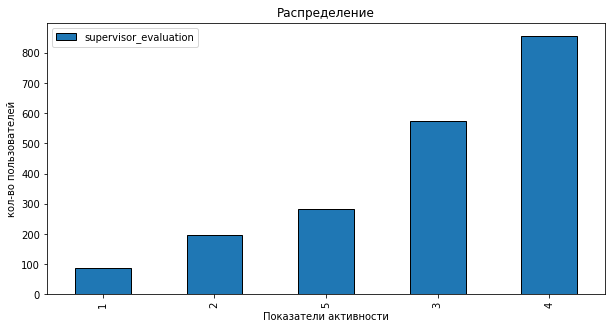

<Figure size 720x360 with 0 Axes>

In [34]:
analysis_BAR(test_data,
             'supervisor_evaluation',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             20)

<b> Вывод :</b>   

Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


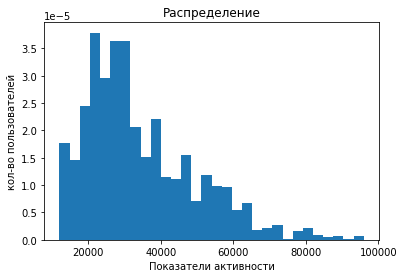

<Figure size 720x360 with 0 Axes>

In [35]:
analysis_HIST(test_data,
             'salary',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод :</b>   
В среднем у большинства сотрудников зарплата сосредоточена от 20 до 50 тысяч, также можно сделать вывод что у многих ставка 30 тыссяч, так как на графике видно выброс

count    2000.000000
mean       54.841500
std        22.017192
min         3.000000
25%        38.000000
50%        57.000000
75%        72.000000
max       100.000000
Name: job_satisfaction_rate, dtype: float64


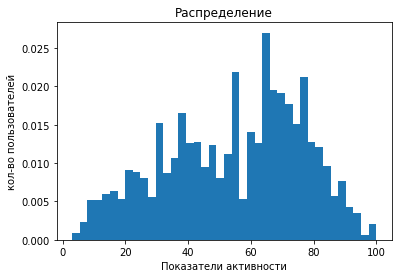

<Figure size 720x360 with 0 Axes>

In [36]:
analysis_HIST(test_data,
             'job_satisfaction_rate',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             40)

<b> Вывод :</b>   

В среднем удовлетворенность компанией склоняется в большую сторону (от 60 до 80%)

<b> Вывод по разделу :</b>   

1. В среднем распределение оценок рабоыт компании лишено каких то особенно популярных значений.  
2. наибольшее количество сотрудников занято продажами и технологиями 
3. Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 45 процентов  
4. Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо
5. Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата  
6. Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании  
7. Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год  
8. Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.
9. В среднем у большинства сотрудников зарплата сосредоточена от 20 до 50 тысяч, также можно сделать вывод что у многих ставка 35 тысяч, так как на графике видно выброс
10. В среднем удовлетворенность компанией склоняется в большую сторону (от 60 до 80%)

In [37]:
data_corr=test_data.drop(['id'], axis=1)

corr_matrix = data_corr.phik_matrix( interval_cols=[
                                                    'salary',
                                                    'job_satisfaction_rate']).sort_values(by='job_satisfaction_rate',
                                                                                          ascending=False)

<Figure size 720x576 with 0 Axes>

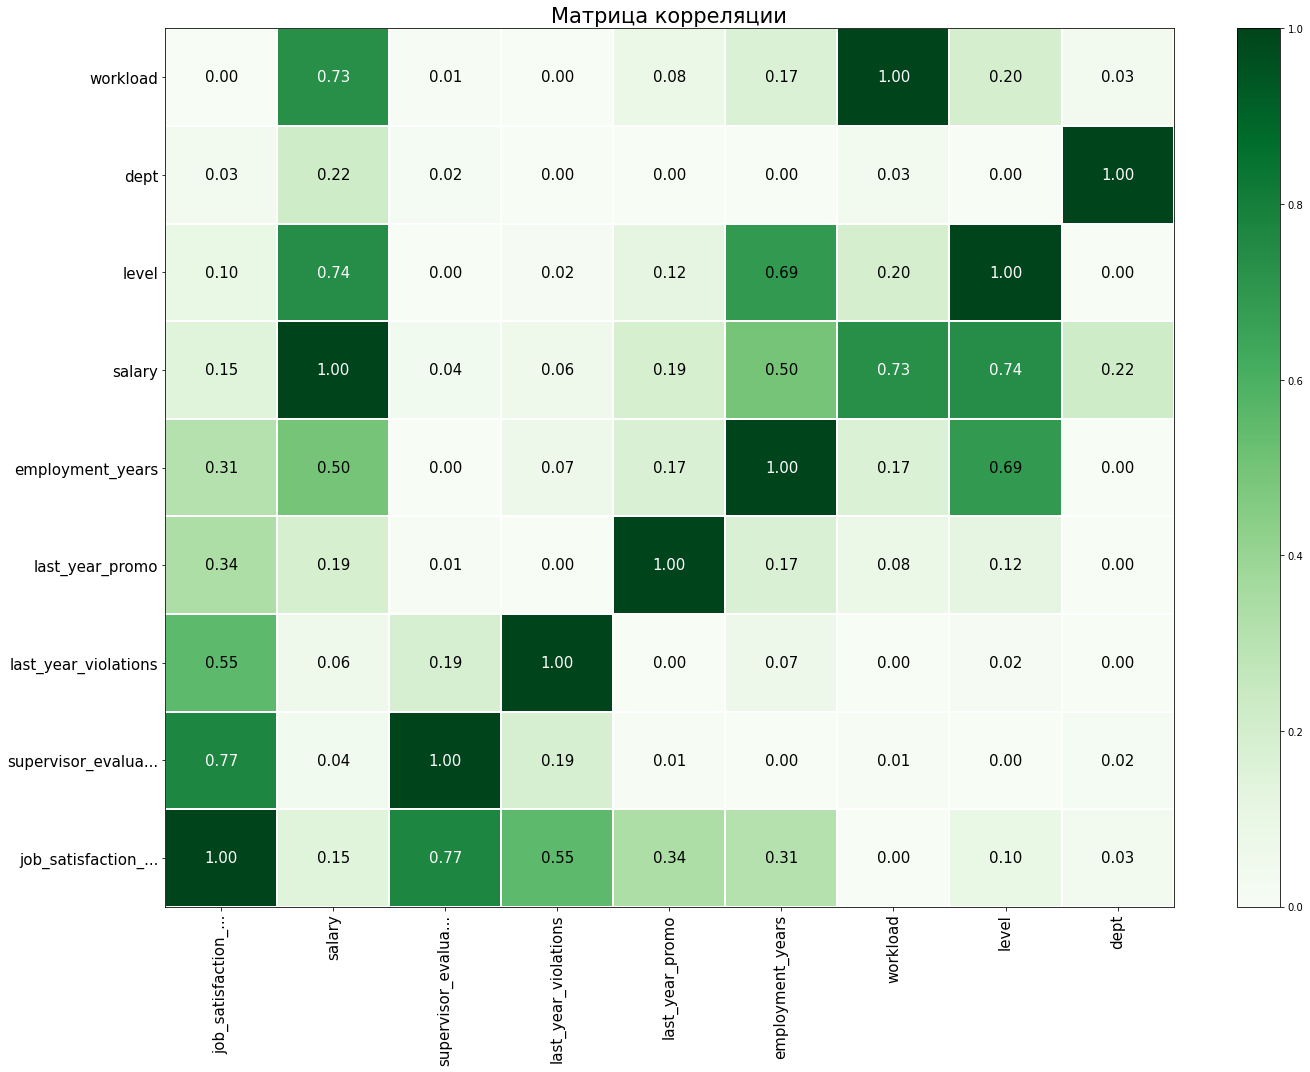

In [38]:
plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plot_correlation_matrix(
    corr_matrix.values,
    x_labels=corr_matrix.columns,
    y_labels=corr_matrix.index,
    vmin=0, vmax=1, color_map="Greens",
    title=r"Матрица корреляции",
    fontsize_factor=1.5,
    figsize=(20, 15)
)

<b> Вывод по разделу :</b>   

1. По анализу данных можно сделать вывод о сходном распределении данных в тестовой и тренировочоной выборках. следовательно их можно использовать вместе без опасения искажения результатов
2. Матрица корреляции позволяет выделить несколько признаков влияющих на целевой:   
supervisor_evaluation, salary, last_year_violations, last_year_promo, employment_years

## Подготовка данных

In [39]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   3994 non-null   object
 2   level                  3996 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   job_satisfaction_rate  4000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id             

In [40]:
train_data['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [41]:
Columns=['dept',
         'last_year_violations',
         'last_year_promo','workload',
         'level','employment_years',
         'supervisor_evaluation' ,'salary']

In [42]:
train_data1=train_data.drop(['id'], axis=1)
                        
test_data1=test_data.drop(['id'], axis=1)


display(train_data1.duplicated().sum())
display(test_data1.duplicated().sum())

258

84

In [43]:
train_data1=train_data1.drop_duplicates()

In [44]:
X_train=train_data1.drop(['job_satisfaction_rate'], axis=1)
                        
X_test=test_data1.drop(['job_satisfaction_rate'], axis=1)
                      
y_train=train_data1['job_satisfaction_rate']
#y_train = pd.DataFrame(y_train )                      
y_test=test_data1['job_satisfaction_rate']
#y_test = pd.DataFrame(y_test )

In [45]:
display(X_train.duplicated().sum())
display(X_test.duplicated().sum())
display(y_train.duplicated().sum())
display(y_test.duplicated().sum())

1234

557

3646

1904

In [46]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(3742, 8)

(2000, 8)

(3742,)

(2000,)

In [47]:
print(X_train .info())
print(X_test .info())
print(X_train['dept'].unique())
print(X_test['dept'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   3736 non-null   object
 1   level                  3738 non-null   object
 2   workload               3742 non-null   object
 3   employment_years       3742 non-null   int64 
 4   last_year_promo        3742 non-null   object
 5   last_year_violations   3742 non-null   object
 6   supervisor_evaluation  3742 non-null   int64 
 7   salary                 3742 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 263.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload    

<b> Вывод :</b>    

Подготовили разделение признаков для пайплайнов.
Офоримили выборки 
  

## Модели

In [48]:
ohe_columns = ['dept', 'last_year_violations', 'last_year_promo']
ord_columns = ['workload', 'level']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

In [49]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [50]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['medium', 'low', 'high'],
                    ['junior', 'middle', 'sinior']
                    
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [51]:

data_preprocessor1 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 


In [52]:
data_preprocessor2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('oe', ord_pipe, ord_columns)
    ],
    remainder='passthrough'
)

pipe_final0 = Pipeline(
    [(
        ('preprocessor', data_preprocessor2),
        ('models', DecisionTreeClassifier(random_state=42))
     ),
     (
        ('preprocessor', data_preprocessor1),
        ('models',  LinearRegression())
     )]
)

In [53]:
X_train1   = pd.DataFrame(
    data_preprocessor1.fit_transform(X_train ),
    columns=data_preprocessor1.get_feature_names_out()
)


X_test1  = pd.DataFrame(
    data_preprocessor1.transform(X_test ),
    columns=data_preprocessor1.get_feature_names_out()
)


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [54]:
X_train2   = pd.DataFrame(
    data_preprocessor2.fit_transform(X_train ),
    columns=data_preprocessor2.get_feature_names_out()
)


X_test2  = pd.DataFrame(
    data_preprocessor2.transform(X_test ),
    columns=data_preprocessor2.get_feature_names_out()
)

print(X_train2.info())
print(X_test2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ohe__dept_marketing               3742 non-null   float64
 1   ohe__dept_purchasing              3742 non-null   float64
 2   ohe__dept_sales                   3742 non-null   float64
 3   ohe__dept_technology              3742 non-null   float64
 4   ohe__last_year_violations_yes     3742 non-null   float64
 5   ohe__last_year_promo_yes          3742 non-null   float64
 6   oe__workload                      3742 non-null   float64
 7   oe__level                         3742 non-null   float64
 8   remainder__employment_years       3742 non-null   float64
 9   remainder__supervisor_evaluation  3742 non-null   float64
 10  remainder__salary                 3742 non-null   float64
dtypes: float64(11)
memory usage: 321.7 KB
None
<class 'pandas.core.frame.

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [55]:
def custom_metric(y_true, y_pred): 
    y_true_np = np.array(y_true) 
    y_pred_np = np.array(y_pred) 
    return 100/len(y_true_np) * np.sum(np.abs(y_true_np - y_pred_np) / ((np.abs(y_true_np) + np.abs(y_pred_np)) / 2))


smape = make_scorer(custom_metric, greater_is_better=False)

###  LinearRegression 

In [56]:
model_lr = LinearRegression()

smape_lr = cross_val_score(model_lr, X_train1, y_train , scoring=smape).mean() * -1
print(f'Best score: {smape_lr}')

Best score: 26.81424322175481


###  DecisionTreeRegressor 

In [57]:
RANDOM_STATE=42

In [58]:
model_dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)

parameters = {
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'max_depth': (None, *range(2, 20)),
}

RandomizedSearch = RandomizedSearchCV(
    model_dtr,
    parameters,
    n_jobs = -1,
    scoring = smape,
    random_state=RANDOM_STATE
)

RandomizedSearch.fit(X_train2, y_train )

smapeRS  = RandomizedSearch.best_score_ * -1

print(f'Best score: {smapeRS}, best params: {RandomizedSearch.best_params_}')


Best score: 15.475798471293762, best params: {'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 12}


In [59]:
results_regression = pd.DataFrame(
    [
        ['LinearRegression', 'default', smape_lr],
        ['DecisionTreeRegressor', RandomizedSearch.best_params_, smapeRS]
    ],
    columns=['model', 'params', 'SMAPE']
)
results_regression.sort_values(by='SMAPE')

,model,params,SMAPE
1,DecisionTreeRegressor,"{'min_samples_split': 12, 'min_samples_leaf': ...",15.475798
0,LinearRegression,default,26.814243


In [60]:
prediction  = RandomizedSearch.predict(X_test2)

In [61]:
custom_metric(y_test, prediction)

14.105739517705352

Максимально эффективная модель:   
 DecisionTreeClassifier('min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 12,random_state=42)
 
Метрика лучшей модели на тренировочной выборке: 14.314710999854146
Проверка по показателю СМАП меньше или равно 15  

## Выводы по блоку 1   
<b>Вывод по импорту:  </b>   

Импортированы данные и инструменты для выполнения работы

<b>Вывод по предобработке:  </b>   

Данные проверены, увеличен показатель целевого признака для уточнения дальнейших расчетов

<b>Вывод по исследовательсткому анализу:  </b>   
В среднем распределение оценок рабоыт компании лишено каких то особенно популярных значений.  
Основная масса распределена от 30 до 80 процентов с перекосом в большую сторону, следовательно удовлетворенность сотрудников можно еще повысить  
наибольшее количество сотрудников занято продажами и технологиями, наименьшее эйч-аром  
Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 45 процентов  
Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо

Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата  
Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании  
Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год  
Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.

В среднем у большинства сотрудников зарплата сосредоточена от 20 до 50 тысяч, также можно сделать вывод что у многих ставка 30 тыссяч, так как на графике видно выброс

<b>Подготовка данных :</b>  

Подготовили разделение признаков для пайплайнов.  
Завершили действия предобработки
Офоримили выборки 
  
<b>Работа с моделями:</b>  

Проверены модели линейно регерсси и дерева данных, по итогу проверки эффективнее оказался второй вариант.   
 DecisionTreeClassifier('min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 12,random_state=42)
 
Метрика лучшей модели на тренировочной выборке: 14.314710999854146
Проверка по показателю СМАП меньше или равно 15  

# Блок 2

##   Импорт данных

In [62]:
train_quit= pd.read_csv('/datasets/train_quit.csv')
test_features_data= pd.read_csv('/datasets/test_features.csv')
test_target_data2= pd.read_csv('/datasets/test_target_quit.csv')

## Предобработка данных

### Предобработка train_quit

In [63]:
display(train_quit.head(10))
train_quit.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


### Предобработка test_target_quit

In [64]:
test_features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [65]:
test_target_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [66]:
test_quit=test_features_data.copy()

In [67]:
test_quit = test_quit.merge(test_target_data2[['quit', 'id']], how='right', on='id')

In [68]:
test_quit1 = test_quit.merge(test_data[['job_satisfaction_rate', 'id']], how='right', on='id')

In [69]:
display(test_quit.head(10))
test_quit.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,999029,technology,junior,medium,1,no,no,3,31200,yes
1,372846,sales,middle,medium,10,no,yes,2,32400,no
2,726767,marketing,middle,low,7,no,no,4,20400,no
3,490105,purchasing,middle,low,7,no,no,4,19200,no
4,416898,purchasing,junior,low,1,no,no,4,12000,yes
5,223063,sales,middle,medium,6,no,no,4,38400,no
6,810370,hr,junior,medium,1,no,no,5,26400,no
7,998900,marketing,middle,medium,7,no,no,3,45600,no
8,578329,sales,sinior,medium,10,no,no,5,46800,no
9,648850,sales,middle,high,9,no,no,5,57600,no


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


In [70]:
display(test_quit['dept'].unique())
display(test_quit['level'].unique())
display(test_quit['workload'].unique())

array(['technology', 'sales', 'marketing', 'purchasing', 'hr', nan, ' '],
      dtype=object)

array(['junior', 'middle', 'sinior', nan], dtype=object)

array(['medium', 'low', 'high', ' '], dtype=object)

<b> Вывод :</b>   

Данные проверены 

Присутсвуют пустые и пропущенные значения, которые скорее всего связаны с недостаточной информацией о сотрудниках(Неизвестен уровень загружения, или присутсвуют сложности в определении уровня квалификации), либо ошибками в заполнении(Сотрудник может работать в отделах, не соответсвующих наиболее распространенным вариантам).

Собрал в единые фреймы данные по тестовой и тренирвоочной выборках


## Исследовательский анализ данных

### Исследовательский анализ  train_quit


count     4000
unique       2
top         no
freq      2872
Name: quit, dtype: object


yes    1128
no     2872
Name: quit, dtype: int64

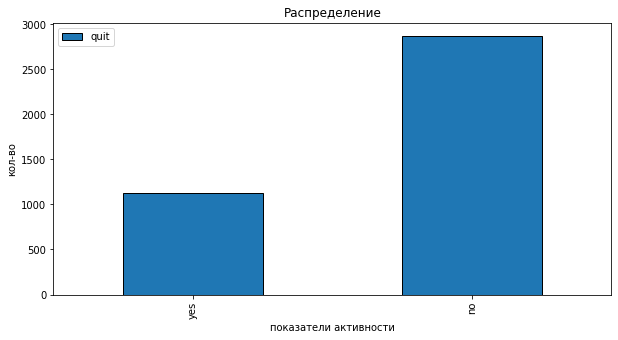

<Figure size 720x360 with 0 Axes>

In [71]:
analysis_BAR(train_quit,
             'quit',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count      4000
unique        5
top       sales
freq       1438
Name: dept, dtype: object


hr             464
marketing      582
purchasing     588
technology     928
sales         1438
Name: dept, dtype: int64

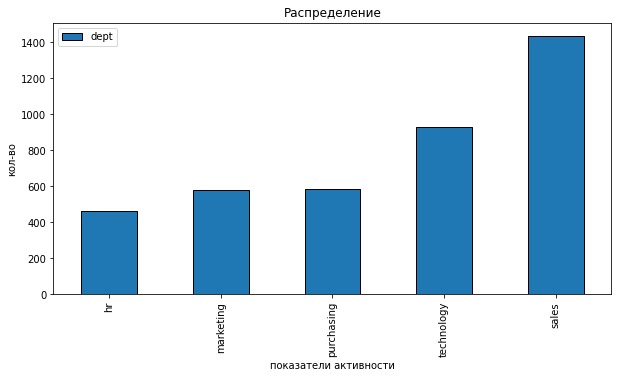

<Figure size 720x360 with 0 Axes>

In [72]:
analysis_BAR(train_quit,
             'dept',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count       4000
unique         3
top       junior
freq        1949
Name: level, dtype: object


sinior     357
middle    1694
junior    1949
Name: level, dtype: int64

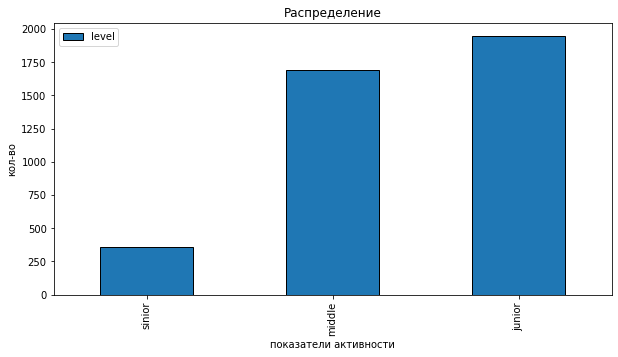

<Figure size 720x360 with 0 Axes>

In [73]:
analysis_BAR(train_quit,
             'level',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count       4000
unique         3
top       medium
freq        2118
Name: workload, dtype: object


high       674
low       1208
medium    2118
Name: workload, dtype: int64

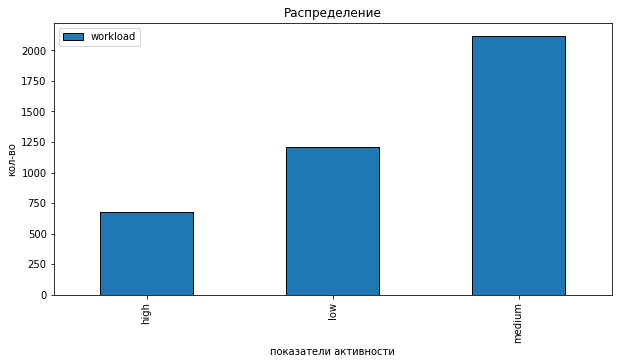

<Figure size 720x360 with 0 Axes>

In [74]:
analysis_BAR(train_quit,
             'workload',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


10     90
9     136
8     174
6     296
7     308
5     362
4     393
3     479
2     777
1     985
Name: employment_years, dtype: int64

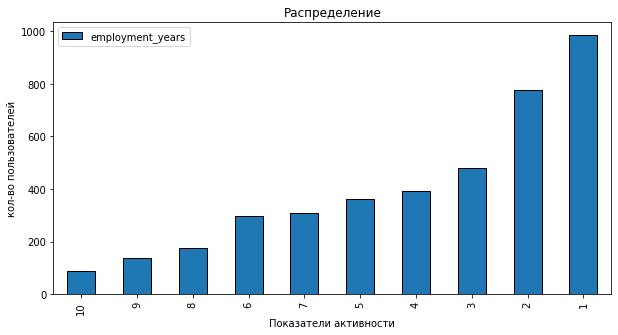

<Figure size 720x360 with 0 Axes>

In [75]:
analysis_BAR(train_quit,
             'employment_years',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             20)

count     4000
unique       2
top         no
freq      3887
Name: last_year_promo, dtype: object


yes     113
no     3887
Name: last_year_promo, dtype: int64

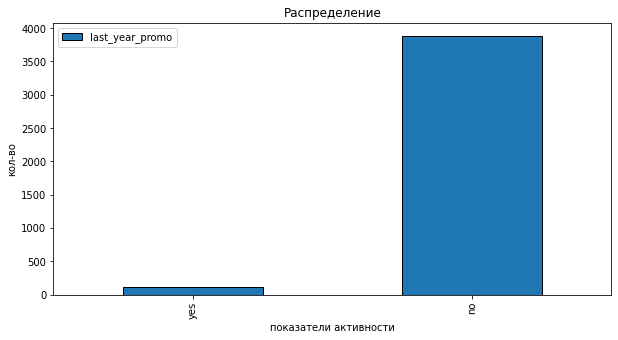

<Figure size 720x360 with 0 Axes>

In [76]:
analysis_BAR(train_quit,
             'last_year_promo',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count     4000
unique       2
top         no
freq      3455
Name: last_year_violations, dtype: object


yes     545
no     3455
Name: last_year_violations, dtype: int64

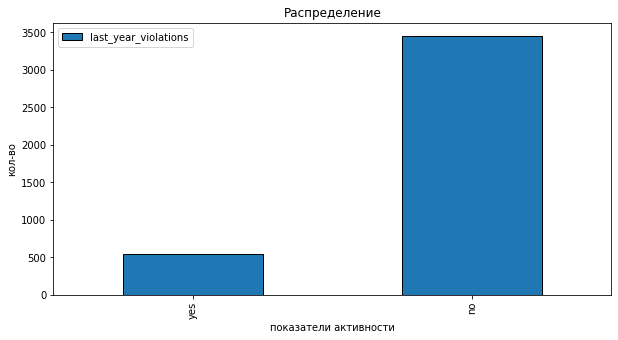

<Figure size 720x360 with 0 Axes>

In [77]:
analysis_BAR(train_quit,
             'last_year_violations',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


1     202
2     391
5     520
3    1233
4    1654
Name: supervisor_evaluation, dtype: int64

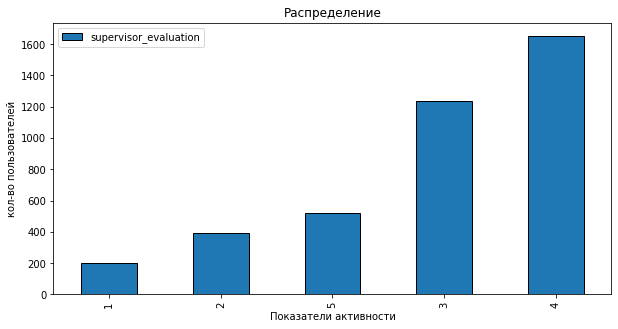

<Figure size 720x360 with 0 Axes>

In [78]:
analysis_BAR(train_quit,
             'supervisor_evaluation',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


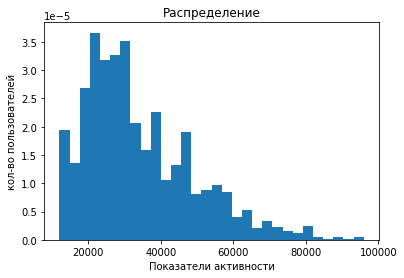

<Figure size 720x360 with 0 Axes>

In [79]:
analysis_HIST(train_quit,
             'salary',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод по разделу :</b>   

1. В тренировочной выборке почти четверть сотрудников уволена
2.  Наибольшее количество сотрудников занято продажами и технологиями, наименьшее эйч-аром  
3. Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 45 процентов  
4. Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо
5. Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата  
6. Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании  
7. Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год  
8. Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.
9. В среднем у большинства сотрудников зарплата сосредоточена от 20 до 40 тысяч, также можно сделать вывод что у многих ставка 30 тысяч, так как на графике видно выброс

Т.е. Распределение аналогично 1 заданию

### Исследовательский анализ  test_quit

count     2000
unique       2
top         no
freq      1436
Name: quit, dtype: object


yes     564
no     1436
Name: quit, dtype: int64

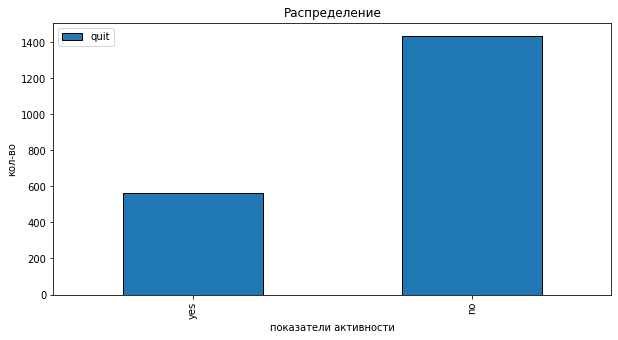

<Figure size 720x360 with 0 Axes>

In [80]:
analysis_BAR(test_quit,
             'quit',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

count      1998
unique        6
top       sales
freq        763
Name: dept, dtype: object


                1
hr            227
purchasing    273
marketing     279
technology    455
sales         763
Name: dept, dtype: int64

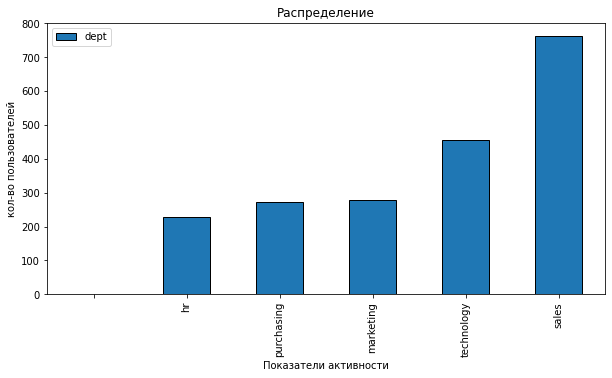

<Figure size 720x360 with 0 Axes>

In [81]:
analysis_BAR(test_quit,
             'dept',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

count       1999
unique         3
top       junior
freq         974
Name: level, dtype: object


sinior    171
middle    854
junior    974
Name: level, dtype: int64

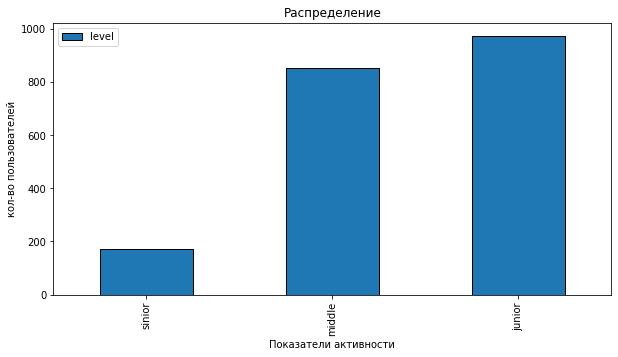

<Figure size 720x360 with 0 Axes>

In [82]:
analysis_BAR(test_quit,
             'level',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

count       2000
unique         4
top       medium
freq        1043
Name: workload, dtype: object


             1
high       363
low        593
medium    1043
Name: workload, dtype: int64

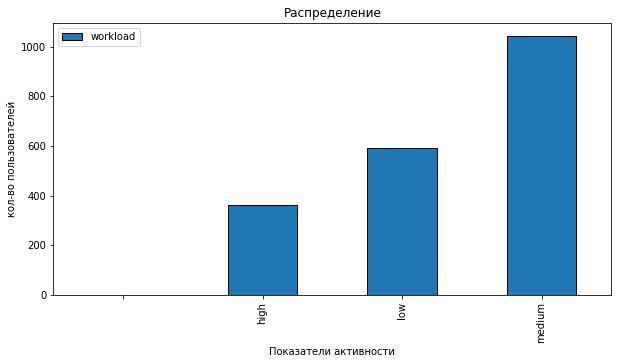

<Figure size 720x360 with 0 Axes>

In [83]:
analysis_BAR(test_quit,
             'workload',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


10     35
9      66
8      91
6     138
7     174
5     179
4     187
3     234
2     374
1     522
Name: employment_years, dtype: int64

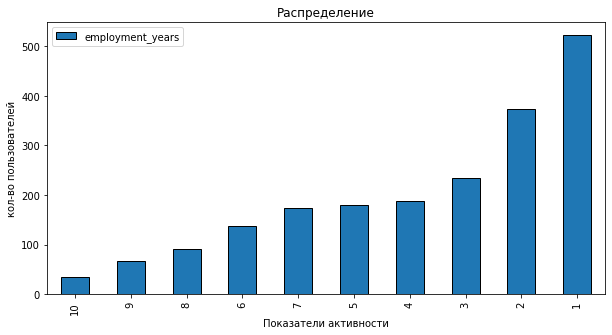

<Figure size 720x360 with 0 Axes>

In [84]:
analysis_BAR(test_quit,
             'employment_years',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             20)

count     2000
unique       2
top         no
freq      1937
Name: last_year_promo, dtype: object


yes      63
no     1937
Name: last_year_promo, dtype: int64

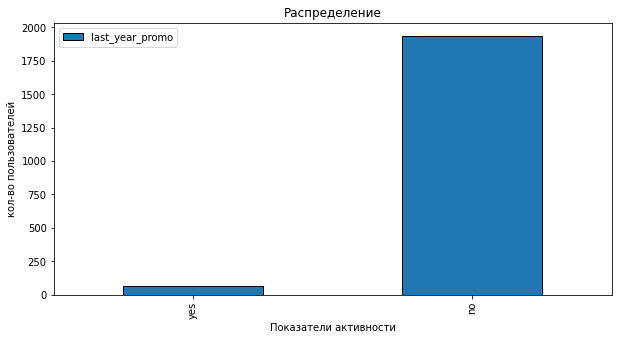

<Figure size 720x360 with 0 Axes>

In [85]:
analysis_BAR(test_quit,
             'last_year_promo',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

count     2000
unique       2
top         no
freq      1738
Name: last_year_violations, dtype: object


yes     262
no     1738
Name: last_year_violations, dtype: int64

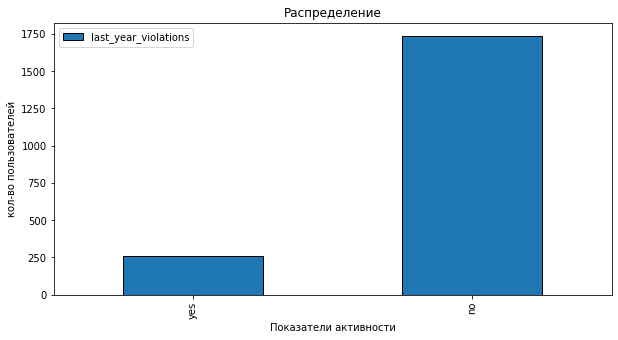

<Figure size 720x360 with 0 Axes>

In [86]:
analysis_BAR(test_quit,
             'last_year_violations',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


1     88
2    196
5    284
3    575
4    857
Name: supervisor_evaluation, dtype: int64

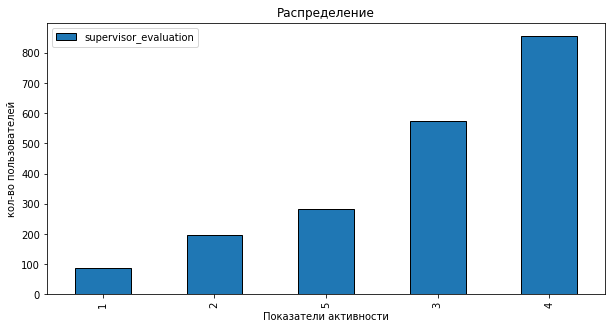

<Figure size 720x360 with 0 Axes>

In [87]:
analysis_BAR(test_quit,
             'supervisor_evaluation',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             20)

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


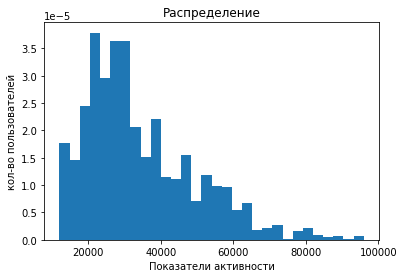

<Figure size 720x360 with 0 Axes>

In [88]:
analysis_HIST(test_quit,
             'salary',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             30)

<b> Вывод по разделу :</b>   

1. Четверть сотрудников в базе данных уже уволены
2. наибольшее количество сотрудников занято продажами(35%) и технологиями(25%)
3. Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 46 % 
4. Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо
5. Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата  
6. Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании  
7. Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год  
8. Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.
9. В среднем у большинства сотрудников зарплата сосредоточена от 20 до 40 тысяч, также можно сделать вывод что у многих ставка 35 тысяч, так как на графике видно выброс
10. В среднем удовлетворенность компанией склоняется в большую сторону (от 60 до 80%)

Т.е. Распределение аналогично 1 заданию

### Портрет уволившегося сотрудника

In [89]:
quited_worker=train_quit.query(" quit== 'yes' ")
quited_worker.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


count      1128
unique        5
top       sales
freq        407
Name: dept, dtype: object


hr            116
marketing     163
purchasing    166
technology    276
sales         407
Name: dept, dtype: int64

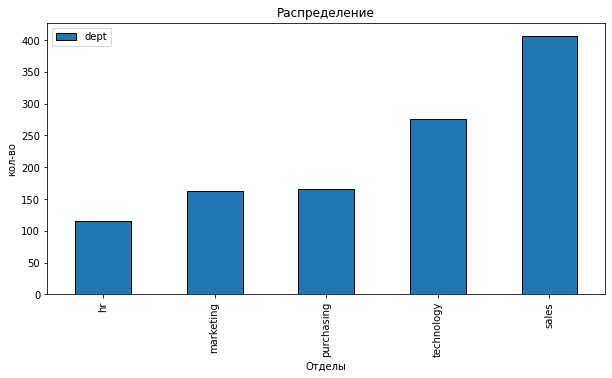

<Figure size 720x360 with 0 Axes>

In [90]:
analysis_BAR(quited_worker,
             'dept',
             'Распределение',
             'Отделы',
             'кол-во',
             40)

count       1128
unique         3
top       junior
freq        1003
Name: level, dtype: object


sinior      17
middle     108
junior    1003
Name: level, dtype: int64

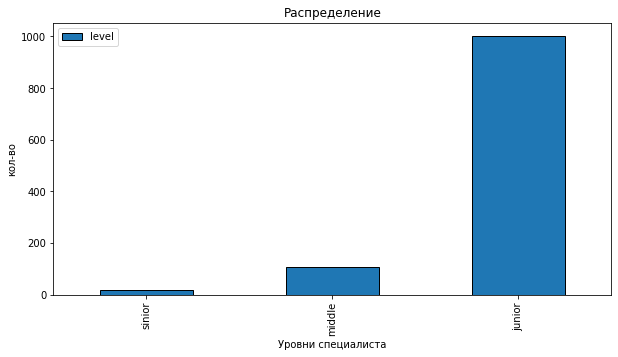

<Figure size 720x360 with 0 Axes>

In [91]:
analysis_BAR(quited_worker,
             'level',
             'Распределение',
             'Уровни специалиста',
             'кол-во',
             40)



count     1128
unique       3
top        low
freq       519
Name: workload, dtype: object


high      121
medium    488
low       519
Name: workload, dtype: int64

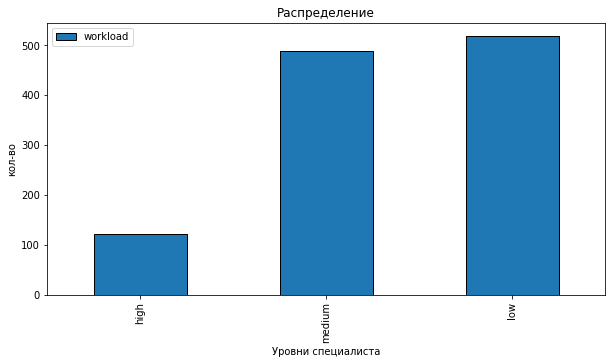

<Figure size 720x360 with 0 Axes>

In [92]:
analysis_BAR(quited_worker,
             'workload',
             'Распределение',
             'Уровни специалиста',
             'кол-во',
             40)

count    1128.000000
mean        1.844858
std         1.274920
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: employment_years, dtype: float64


8       3
9       3
10      3
7       7
6      10
5      23
4      27
3     163
2     290
1     599
Name: employment_years, dtype: int64

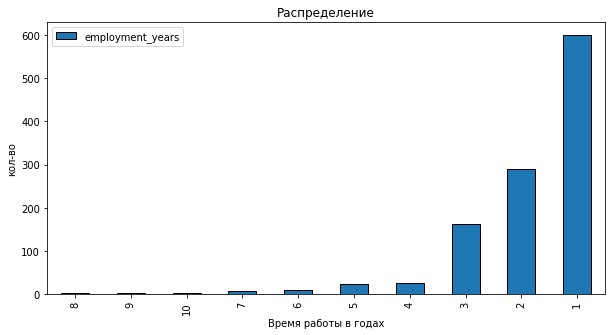

<Figure size 720x360 with 0 Axes>

In [93]:
analysis_BAR(quited_worker,
             'employment_years',
             'Распределение',
             'Время работы в годах',
             'кол-во',
             40)

count     1128
unique       2
top         no
freq      1127
Name: last_year_promo, dtype: object


yes       1
no     1127
Name: last_year_promo, dtype: int64

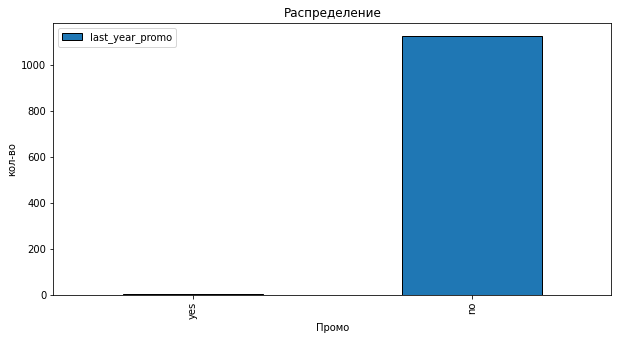

<Figure size 720x360 with 0 Axes>

In [94]:
analysis_BAR(quited_worker,
             'last_year_promo',
             'Распределение',
             'Промо',
             'кол-во',
             40)

count    1128.000000
mean        3.046099
std         0.973291
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


5     60
1     95
2    164
4    286
3    523
Name: supervisor_evaluation, dtype: int64

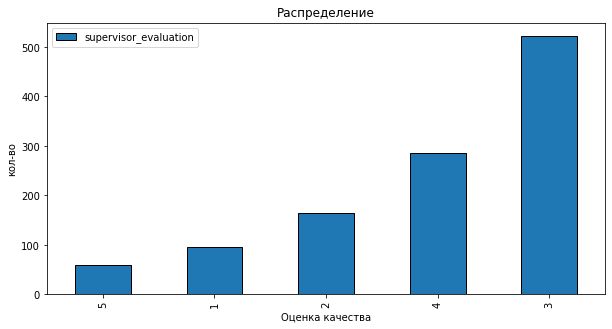

<Figure size 720x360 with 0 Axes>

In [95]:
analysis_BAR(quited_worker,
             'supervisor_evaluation',
             'Распределение',
             'Оценка качества',
             'кол-во',
             40)

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64


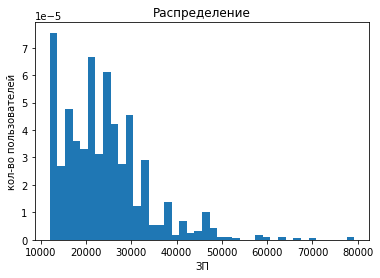

<Figure size 720x360 with 0 Axes>

In [96]:
analysis_HIST(quited_worker,
             'salary',
             'Распределение',
             'ЗП',
             'кол-во пользователей',
             40)


Портрет уволенного сотрудника:  
1. Работает в отделах технологий или продаж
2. Обладает низкой квалификацией
3. Работал со средне-низкой загруженностью
4. Работал в компании не долго (в среднем 1-3 года)
5. Давно не получал повышений
6. Имеет средние оценки качества 3-4 
7. В большинстве своем имеет зарплату до 30к

###  Взаимосвязь Увольнений и Степени удовлетворенности работников

In [97]:
non_quited_worker=test_quit1.query("quit == 'no'")
non_quited_worker.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,130604,technology,junior,medium,1,no,no,4,34800,no,74
1,825977,marketing,middle,high,7,no,no,5,58800,no,75
3,555320,technology,junior,medium,1,no,no,4,34800,no,72
5,817219,technology,junior,medium,2,no,no,5,31200,no,76
6,269033,hr,junior,medium,1,no,no,4,27600,no,64


In [98]:
quited_worker=test_quit1.query("quit == 'yes'")
quited_worker.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
2,418490,purchasing,junior,low,1,no,no,4,19200,yes,60
4,826430,technology,junior,medium,1,no,yes,2,30000,yes,8
20,508688,marketing,junior,low,1,no,no,3,16800,yes,57
29,343440,marketing,junior,medium,2,no,no,1,26400,yes,35
30,622918,marketing,junior,low,2,no,no,4,18000,yes,77


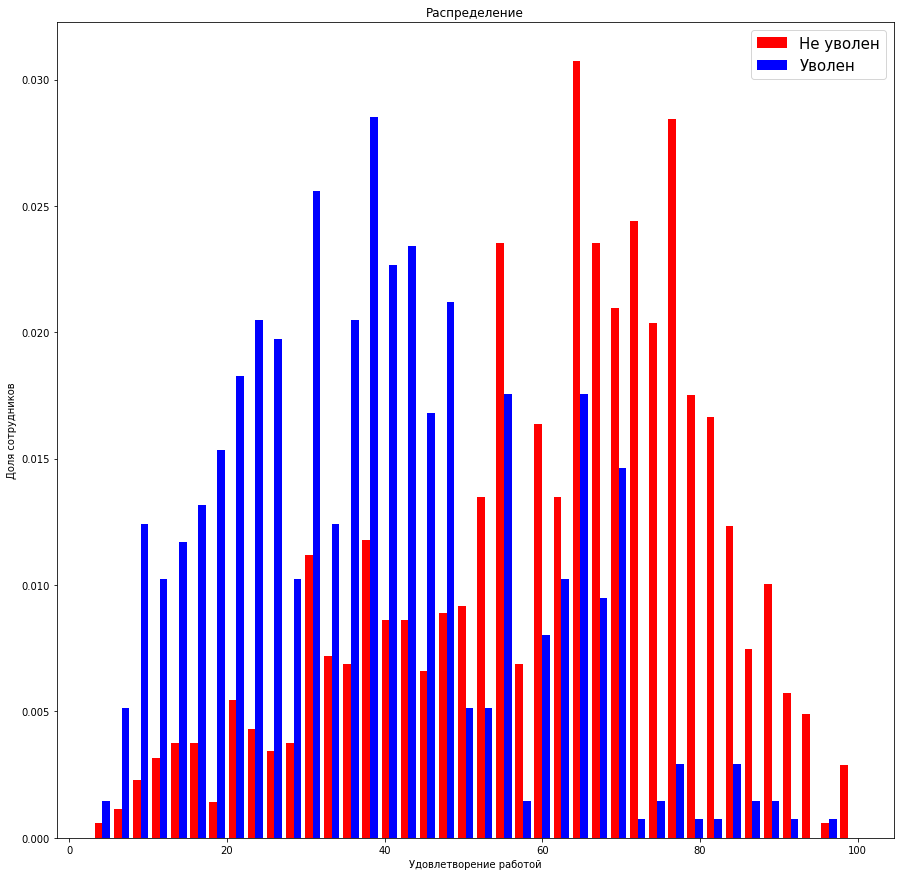

In [99]:
colors=['red','blue']
labels=['Не уволен','Уволен']
plt.figure(figsize=(15,15))
plt.hist(x=[non_quited_worker['job_satisfaction_rate'],quited_worker['job_satisfaction_rate']],
         color = colors, bins=40 , density=True,
         label=labels);
plt.title('Распределение')
plt.xlabel('Удовлетворение работой')
plt.ylabel('Доля сотрудников')
plt.legend(['Не уволен','Уволен'])
plt.legend(loc=1)
plt.legend(prop={'size': 15}, title = '')



<b> Вывод :</b>   


Можно заметить что присутсвует прямая зависимость между удовлетворенностью работой в компании и тем уволен сотрудник или нет

##  Добавление нового входного признака

In [100]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [101]:
train_quit1=train_quit.drop(['quit','id'], axis=1)
X_train00   = pd.DataFrame(
    data_preprocessor2.fit_transform(train_quit1 ),
    columns=data_preprocessor2.get_feature_names_out()
)
train_quit1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 250.1+ KB


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
y_train_pred = RandomizedSearch.predict(X_train00)

In [103]:
train_quit['job_satisfaction_rate']=y_train_pred
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,65.738095
1,814010,sales,junior,medium,2,no,no,4,27600,no,83.608696
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,36.869565
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,33.900000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,69.000000


In [104]:
test_quit1=test_quit.drop(['quit','id'], axis=1)
test_quit1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [105]:
X_train01   = pd.DataFrame(
    data_preprocessor2.transform(test_quit1),
    columns=data_preprocessor2.get_feature_names_out()
)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [106]:
y_test_pred = RandomizedSearch.predict(X_train01)

test_quit['job_satisfaction_rate']=y_test_pred
test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,999029,technology,junior,medium,1,no,no,3,31200,yes,26.7
1,372846,sales,middle,medium,10,no,yes,2,32400,no,20.6
2,726767,marketing,middle,low,7,no,no,4,20400,no,60.0
3,490105,purchasing,middle,low,7,no,no,4,19200,no,68.4
4,416898,purchasing,junior,low,1,no,no,4,12000,yes,49.5


In [107]:
test_quit.info()
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   quit                   2000 non-null   object 
 10  job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 187.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dt

##  Кодирование пайплайнов+ разбитие на выборки

<Figure size 720x576 with 0 Axes>

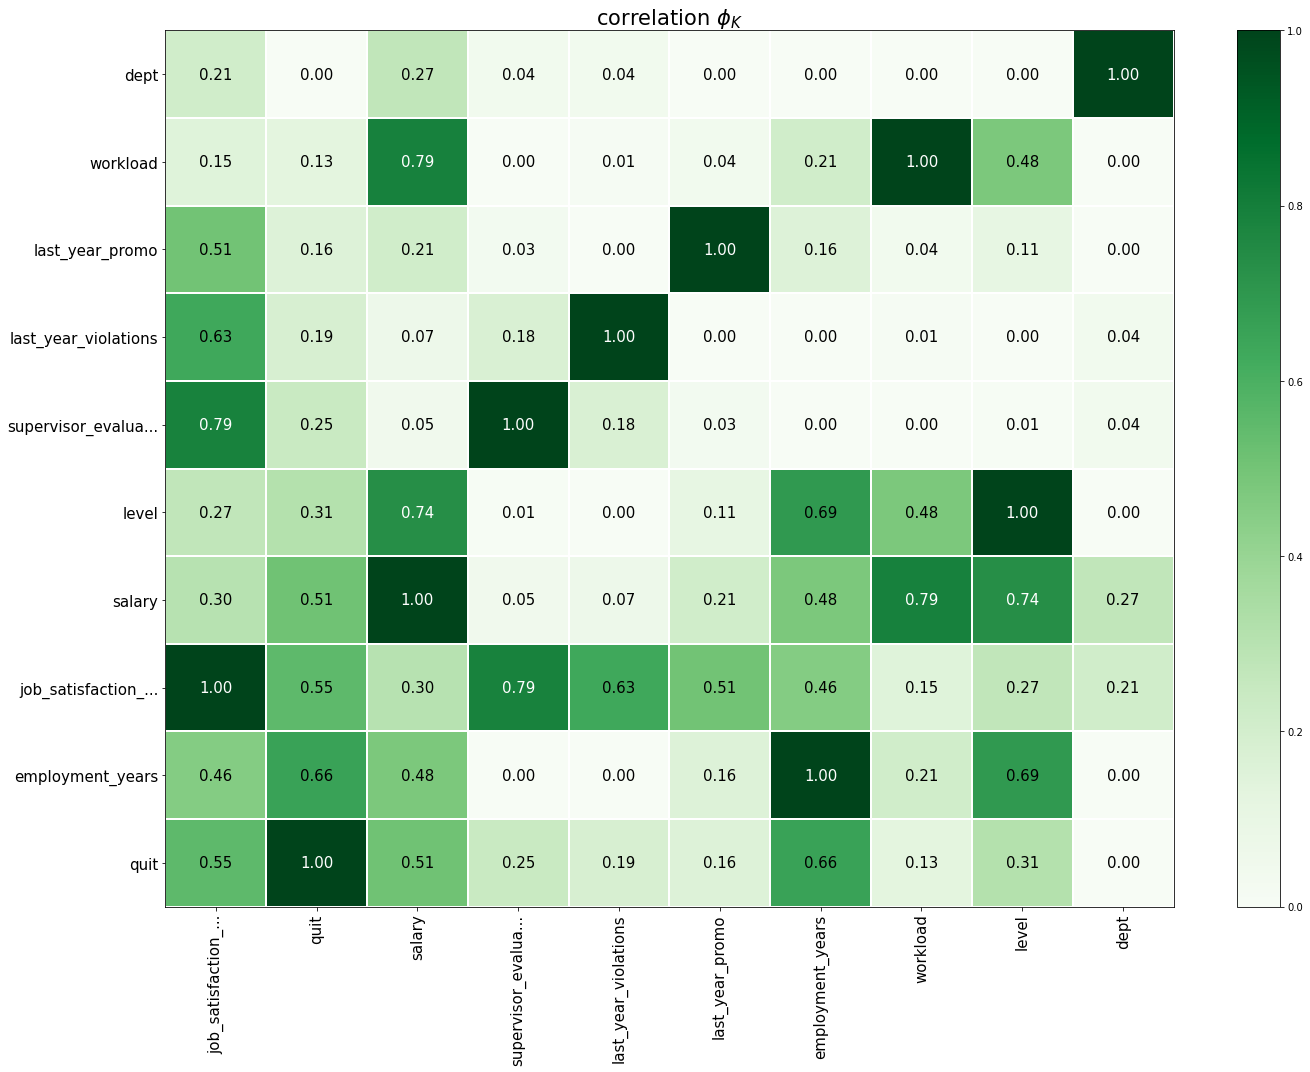

In [108]:
# Вычисление матрицы корреляции с использованием phik
data_corr=train_quit.copy()
data_corr=data_corr.drop([ 'id'], axis=1)
corr_matrix = data_corr.phik_matrix( interval_cols=['salary', 'job_satisfaction_rate']).sort_values(by='quit', ascending=False)
plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plot_correlation_matrix(
    corr_matrix.values,
    x_labels=corr_matrix.columns,
    y_labels=corr_matrix.index,
    vmin=0, vmax=1, color_map="Greens",
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(20, 15)
)

<b> Вывод :</b>   
Наиболее влияющие на целевой показатель признаки:  
1. employment_years
2. job_satisfaction_rate
3. salary
4. level
5. supervisor_evaluation
6. last_year_violations
 
От показателя dept можно отказаться, так как он не оказывает на целевой признак влияния

In [109]:
ohe_columns2 = ['last_year_violations', 'dept', 'last_year_promo']
ord_columns2 = [ 'level','workload']
num_columns2 = ['employment_years', 'supervisor_evaluation','salary','job_satisfaction_rate']
RANDOM_STATE=42

In [110]:
train_quit0=train_quit.drop(['id'], axis=1)
                        
test_quit0=test_quit.drop(['id'], axis=1)

train_quit0=train_quit0.drop_duplicates()
display(train_quit0.duplicated().sum())

X_train2=train_quit0.drop(['quit'], axis=1)
                    
X_test2=test_quit0.drop(['quit'], axis=1)
                      
y_train2=train_quit0['quit']
                      
y_test2=test_quit0['quit']

0

In [111]:
data_preprocessor1 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns2),
        ('ord', ord_pipe, ord_columns2),
        ('num', StandardScaler(), num_columns2)
    ], 
    remainder='passthrough'
) 
data_preprocessor2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns2),
        ('oe', ord_pipe, ord_columns2)
    ],
    remainder='passthrough'
)

In [112]:
X_train1   = pd.DataFrame(
    data_preprocessor1.fit_transform(X_train2 ),
    columns=data_preprocessor1.get_feature_names_out()
)


X_test1  = pd.DataFrame(
    data_preprocessor1.transform(X_test2 ),
    columns=data_preprocessor1.get_feature_names_out()
)


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [113]:
X_train1   = pd.DataFrame(
    data_preprocessor1.fit_transform(X_train2),
    columns=data_preprocessor1.get_feature_names_out()
)


X_test1  = pd.DataFrame(
    data_preprocessor1.transform(X_test2),
    columns=data_preprocessor1.get_feature_names_out()
)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [114]:
X_train2   = pd.DataFrame(
    data_preprocessor2.fit_transform(X_train2),
    columns=data_preprocessor2.get_feature_names_out()
)


X_test2  = pd.DataFrame(
    data_preprocessor2.transform(X_test2),
    columns=data_preprocessor2.get_feature_names_out()
)


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [0 1]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [115]:
label_encoder = LabelEncoder()
y_train2 = label_encoder.fit_transform(y_train2)
y_test2 = label_encoder.transform(y_test2)

## Обучение моделей

In [116]:
# Не удалять
model = LogisticRegression(
            random_state=42, 
            solver='liblinear', 
            penalty='l1'
        )

parameters = {
    'C':  [1,0.1,0.01,0.001],
}

RSlogic = RandomizedSearchCV(
    model,
    parameters,
    n_jobs = -1,
    scoring ='roc_auc',
    random_state=RANDOM_STATE
)

RSlogic.fit(X_train1, y_train2 )

roc_auc_logic = RSlogic.best_score_

print(f'Best score: {roc_auc_logic}, best params: {RSlogic.best_params_}')
 

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best score: 0.8959727205859132, best params: {'C': 1}


In [117]:
KNeighbors = KNeighborsClassifier()

parameters = {
    'n_neighbors': range(1, 100),
}

RSKN = RandomizedSearchCV(
    KNeighbors,
    parameters,
    n_jobs = -1,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE
)

RSKN.fit(X_train1, y_train2)

roc_KN = RSKN.best_score_

print(f'Best score: {roc_KN}, best params: {RSKN.best_params_}')
 

Best score: 0.8923201963591267, best params: {'n_neighbors': 85}


In [118]:
model_SVC = SVC(random_state=RANDOM_STATE)

parameters = {
    'C': np.arange(0.1, 2, 0.1),
}

RSSVC = RandomizedSearchCV(
    model_SVC,
    parameters,
    n_jobs = -1,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE
)

RSSVC.fit(X_train1, y_train2)

roc_SVC = RSSVC.best_score_

print(f'Best score: {roc_SVC}, best params: {RSSVC.best_params_}')

 

Best score: 0.885122930391789, best params: {'C': 0.1}


In [119]:
DecisionTree = DecisionTreeClassifier(random_state=42)

parameters = {
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(2, 50),
    'max_features': range(1, 50),
    'max_depth': (range(2, 50)),
}

RSTree = RandomizedSearchCV(
    DecisionTree,
    parameters,
    n_jobs = -1,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE
)

RSTree.fit(X_train2, y_train2 )

roc_RSTree = RSTree.best_score_

print(f'Best score: {roc_RSTree}, best params: {RSTree.best_params_}')


Best score: 0.8877292869012188, best params: {'min_samples_split': 25, 'min_samples_leaf': 35, 'max_features': 49, 'max_depth': 16}


In [120]:
DecisionTree = RandomForestClassifier(random_state=42)

parameters = {
    'min_samples_split': range(2, 50),
    'min_samples_leaf': range(2, 50),
    'max_features': range(1, 50),
    'max_depth': (range(2, 50)),
}

RSDTree = RandomizedSearchCV(
    DecisionTree,
    parameters,
    n_jobs = -1,
    scoring = 'roc_auc',
    random_state=RANDOM_STATE
)

RSDTree.fit(X_train2, y_train2 )

roc_RSDTree = RSDTree.best_score_

print(f'Best score: {roc_RSDTree}, best params: {RSDTree.best_params_}')

Best score: 0.8980139446785387, best params: {'min_samples_split': 30, 'min_samples_leaf': 16, 'max_features': 7, 'max_depth': 40}


In [121]:
print(f'Best score: {roc_auc_logic}, best params: {RSlogic.best_params_}')
print(f'Best score: {roc_KN}, best params: {RSKN.best_params_}')
print(f'Best score: {roc_SVC}, best params: {RSSVC.best_params_}')
print(f'Best score: {roc_RSTree}, best params: {RSTree.best_params_}')
print(f'Best score: {roc_RSDTree}, best params: {RSDTree.best_params_}')

Best score: 0.8959727205859132, best params: {'C': 1}
Best score: 0.8923201963591267, best params: {'n_neighbors': 85}
Best score: 0.885122930391789, best params: {'C': 0.1}
Best score: 0.8877292869012188, best params: {'min_samples_split': 25, 'min_samples_leaf': 35, 'max_features': 49, 'max_depth': 16}
Best score: 0.8980139446785387, best params: {'min_samples_split': 30, 'min_samples_leaf': 16, 'max_features': 7, 'max_depth': 40}


In [122]:
prediction  = RSDTree.predict_proba(X_test2)[:, 1]
print('Результат на тестовой выборке',roc_auc_score(y_test2, prediction))

Результат на тестовой выборке 0.9145324631067385


<b> Вывод :</b>   
 
Метрика лучшей модели на тестовой выборке:  0.9145324631067385   
Это   соответсвует заданному условию, по которуму модель должна быть больше или равна 0.91


## Выводы по блоку 2

<b>Вывод по импорту:  </b>   

Импортированы данные 

<b>Вывод по предобработке:  </b>   

Предобработка проведена по шаблону аналогичному первому блоку

<b>Вывод по исследовательсткому анализу:  </b>   
Получены требуемые рещультаты исследовательского анализа, а именно:
<b>   Портрет уволенного сотрудника: </b>
1. Работает в отделах технологий или продаж
2. Обладает низкой квалификацией
3. Работал со средне-низкой загруженностью
4. Работал в компании не долго (в среднем 1-3 года)
5. Давно не получал повышений
6. Имеет средние оценки качества 3-4 
7. В большинстве своем имеет зарплату до 30к
<b>   Зависимость удовлетворения компанией от увольнений </b>

Доказали что эти признаки не связаны

<b>Подготовка данных :</b>  

Подготовили разделение признаков для пайплайнов. 
Удалили наименее важные для целеовго признака показатели
Завершили действия предобработки
Офоримили выборки 
  
<b>Работа с пайплайнами:</b>  

Был создан пайплайн и модель для поиска максимально эффективной метрики :  
 DecisionTreeClassifier{'min_samples_split': 9, 'min_samples_leaf': 47, 'max_features': 64, 'max_depth': 38})
 
Метрика лучшей модели на тренировочной выборке: 0.910026665659567   
Это соответсвует заданному условию, по которуму модель должна быть больше или равна 0.91

## Выводы общие


<b>Выводы по блоку 1   </b>  

<b>Вывод по импорту:  </b>   
Импортированы данные и инструменты для выполнения работы

<b>Вывод по предобработке:  </b>   
Данные проверены, увеличен показатель целевого признака для уточнения дальнейших расчетов

<b>Вывод по исследовательсткому анализу:  </b>   
В среднем распределение оценок рабоыт компании лишено каких то особенно популярных значений.  
Основная масса распределена от 30 до 80 процентов с перекосом в большую сторону, следовательно удовлетворенность сотрудников можно еще повысить  
наибольшее количество сотрудников занято продажами и технологиями, наименьшее эйч-аром  
Наибольшее количество сотрудников обладают низкими и средними уровнями работы, примерно по 45 процентов  
Почти половина сотрудников загружаются задачами средне, еще 30% загружены слабо

Можно увидеть что количество пришедших сотрудников почти линейно связано с временем существования компании, видимо это связано с развитием и расширением штата  
Почти 97 процентов сотрудников не получало повышения за последний год, возможно стоит обратить внимание на карьерные лифты и структуру компании  
Почти 15% сотрудников из представленных нарушали трудовой договор за послдений год  
Большая часть сотрудников имеют среднюю оценку деятельности 3 или 4.

В среднем у большинства сотрудников зарплата сосредоточена от 20 до 50 тысяч, также можно сделать вывод что у многих ставка 30 тыссяч, так как на графике видно выброс

<b>Подготовка данных :</b>  

Подготовили разделение признаков для пайплайнов.  
Завершили действия предобработки
Офоримили выборки 
  
<b>Работа с пайплайнами:</b>  

Был создан пайплайн и модель для поиска максимально эффективной метрики :  
 DecisionTreeClassifier(max_depth=9, max_features=9, random_state=42) 
 
Проверка по показателю СМАП- (Значение -22.7068, по условию должно быть меньше или равно 15)

<b>Выводы по блоку 2</b> 

<b>Вывод по импорту:  </b>   

Импортированы данные 

<b>Вывод по предобработке:  </b>   

Предобработка проведена по шаблону аналогичному первому блоку

<b>Вывод по исследовательсткому анализу:  </b>   
Получены требуемые рещультаты исследовательского анализа, а именно:
<b>   Портрет уволенного сотрудника: </b>
1. Работает в отделах технологий или продаж
2. Обладает низкой квалификацией
3. Работал со средне-низкой загруженностью
4. Работал в компании не долго (в среднем 1-3 года)
5. Давно не получал повышений
6. Имеет средние оценки качества 3-4 
7. В большинстве своем имеет зарплату до 30к
<b>   Зависимость удовлетворения компанией от увольнений </b>

Доказали что эти признаки не связаны

<b>Подготовка данных :</b>  

Подготовили разделение признаков для пайплайнов. 
Удалили наименее важные для целеовго признака показатели
Завершили действия предобработки
Офоримили выборки 
  
<b>Работа с пайплайнами:</b>  

Был создан пайплайн и модель для поиска максимально эффективной метрики :  
 RandomForestClassifier{'min_samples_split': 30, 'min_samples_leaf': 16, 'max_features': 7, 'max_depth': 40}
 
Метрика лучшей модели на тестовой выборке: 0.9145324631067385   
Это соответсвует заданному условию, по которуму модель должна быть больше или равна 0.91

<b>Выводы по блоку 2</b> 

Все поставленные задачи выполнены, вычислены модели, соответствующие установленным требованиям.  
Этапы работы подробно расписаны в выводах по блокам, а также занесены в оглавление для удобства ориентирования.  
Также в промежуточных выводах указаны теории и предложения по конкретным особенностям показателей.  
Наиболее эффективной оказалась метрика DecisionTreeClassifier с разными показателями.  

<b>Рекомендации</b> 

Количество уволившихся сотрудников достаточно велико чтобы обратить на это внимание и принять меры по устраению данной проблемы, ведь постоянная текучка кадров наносит урон длительным проектам и разработкам. 

Стоит обратить внимание на следующие показатели: 

1. Оценку деятельности от руководителей (стоит ввести более эффективные модели по стимуляции сотрудников, чтобы повысить качество работы, а применение их обуславаливать оценками. Также стоит проверить качество оценки деятельности, возможно в деятельность проверяющих закралась ошибка)
2. Стоит обратить внимание на зарплаты, большая часть уволившихся специалистов получала зарплату в нижней части списка из доступных в компании
3. Также стоит обратить внимание на множественные нарушения рабочего контракта, для устранения которых нужно либо поменять контракт, либо более качественно информировать сотрудников о его особенностях.
4. Стоит переработать систему должностей, так как подавляющее количество сотрудников не получают повышение
5. Стоит обратить внимание на удержание новых сотрудников, так как большая часть уволившихся работают до 3х лет.